# Trafik Kazası Verisi Analizi (2012–2014)

Bu projede, Birleşik Krallık'ta 2012 ile 2014 yılları arasında gerçekleşen trafik kazalarına ait veriler analiz edilmiştir. Analizin amacı, kazaların ne zaman, nerede ve hangi koşullar altında daha sık meydana geldiğini inceleyerek anlamlı çıkarımlar yapmaktır.

## Hedefler:
- Verinin genel yapısını ve dağılımını incelemek
- Eksik veri analizi 
- Kaza yoğunluklarını zaman, konum ve koşullara göre analiz etmek
- Önemli değişkenler arasındaki ilişkileri görselleştirmek

## Veri Seti:
- Kaynak: UK Department for Transport
- Kapsam: 2012–2014 yılları arası polis kayıtlarına dayalı trafik kazası verileri
- Format: CSV (Comma-Separated Values)

## İçerik:
1. Veri setinin yüklenmesi ve genel bakış
2. Eksik veri analizi ve değerlendirme
3. Değişken açıklamaları
4. Temel istatistiksel analizler
5. Görselleştirme ve yorumlar
6. Sonuçlar ve öneriler


###  Açıklamalar

- **Accident_Index**: Her kazaya özel benzersiz tanımlayıcı.
- **Location_Easting_OSGR**: OSGR (Ordnance Survey Grid Reference) doğu koordinatı.
- **Location_Northing_OSGR**: OSGR kuzey koordinatı.
- **Longitude**: Kazanın gerçekleştiği yerin boylam değeri.
- **Latitude**: Kazanın gerçekleştiği yerin enlem değeri.
- **Police_Force**: Olay yerine müdahale eden polis gücünün kodu.
- **Accident_Severity**: Kazanın ciddiyeti (Örn: Ölümcül, ciddi, hafif).
- **Number_of_Vehicles**: Kazaya karışan araç sayısı.
- **Number_of_Casualties**: Yaralı veya ölü kişi sayısı.
- **Date**: Kaza tarihi.
- **Day_of_Week**: Haftanın günü.
- **Time**: Kazanın meydana geldiği saat.
- **Local_Authority_(District)**: İlçe düzeyinde yerel yönetim adı.
- **Local_Authority_(Highway)**: Karayolları yerel yönetim adı.
- **1st_Road_Class**: Birincil yolun sınıfı (örneğin A, B, M - motorway).
- **1st_Road_Number**: Birincil yolun numarası.
- **Road_Type**: Yol tipi (tek yön, çift yön, vb.).
- **Speed_limit**: Yolun hız limiti (mph).
- **Junction_Detail**: Kavşak detayları.
- **Junction_Control**: Kavşakta trafik kontrolü tipi (örneğin trafik ışığı, işaret, vb.).
- **2nd_Road_Class**: İkincil yolun sınıfı.
- **2nd_Road_Number**: İkincil yolun numarası.
- **Pedestrian_Crossing-Human_Control**: Yaya geçidinde insan kontrolü olup olmadığı.
- **Pedestrian_Crossing-Physical_Facilities**: Fiziksel yaya geçidi altyapısı olup olmadığı.
- **Light_Conditions**: Aydınlatma koşulları (gündüz, gece, sokak lambası, vb.).
- **Weather_Conditions**: Hava koşulları (yağmur, sis, açık hava, vb.).
- **Road_Surface_Conditions**: Yol yüzeyi durumu (kuru, ıslak, buzlu, vb.).
- **Special_Conditions_at_Site**: Kazaya özel çevresel durumlar (örneğin yol çalışması).
- **Carriageway_Hazards**: Yoldaki tehlikeler (örneğin döküntü, araç kalın**_**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
df=pd.read_csv("C:/Users/User/Desktop/Patika Projeler/accidents_2012_to_2014.csv")
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_19288\2323535441.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:/Users/User/Desktop/Patika Projeler/accidents_2012_to_2014.csv")


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002890,2012


In [3]:
df.shape

(464697, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464697 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               464697 non-null  object 
 1   Location_Easting_OSGR                        464697 non-null  int64  
 2   Location_Northing_OSGR                       464697 non-null  int64  
 3   Longitude                                    464697 non-null  float64
 4   Latitude                                     464697 non-null  float64
 5   Police_Force                                 464697 non-null  int64  
 6   Accident_Severity                            464697 non-null  int64  
 7   Number_of_Vehicles                           464697 non-null  int64  
 8   Number_of_Casualties                         464697 non-null  int64  
 9   Date                                         464697 non-nul

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,464697.0,443834.284222,94098.865933,65510.000000,379059.000000,445539.000000,525350.000000,6.553700e+05
Location_Northing_OSGR,464697.0,298625.824462,159470.144826,10290.000000,177710.000000,260680.000000,398959.000000,1.190858e+06
Longitude,464697.0,-1.375156,1.382137,-7.509162,-2.315799,-1.323374,-0.192935,1.759382e+00
Latitude,464697.0,52.575498,1.436370,49.912941,51.484841,52.232169,53.485973,6.059798e+01
Police_Force,464697.0,28.504051,25.334899,1.000000,6.000000,22.000000,45.000000,9.800000e+01
Accident_Severity,464697.0,2.833461,0.402029,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,464697.0,1.828086,0.708703,1.000000,1.000000,2.000000,2.000000,6.700000e+01
Number_of_Casualties,464697.0,1.334420,0.821047,1.000000,1.000000,1.000000,1.000000,9.300000e+01
Day_of_Week,464697.0,4.108740,1.916429,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),464697.0,329.123829,259.222621,1.000000,95.000000,300.000000,511.000000,9.410000e+02


In [6]:
df.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                                           0
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                               13
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [7]:
missing_percentages = df.isnull().mean() * 100

In [8]:
missing_percentages = missing_percentages[missing_percentages > 0].sort_values(ascending=False)
print(missing_percentages)

Junction_Detail                                100.000000
Carriageway_Hazards                             98.311373
Special_Conditions_at_Site                      97.781350
Junction_Control                                38.435798
LSOA_of_Accident_Location                        6.179941
Road_Surface_Conditions                          0.162471
Time                                             0.002798
Did_Police_Officer_Attend_Scene_of_Accident      0.000430
dtype: float64


####  Analiz Dışı Bırakılması Gereken Sütunlar
Bu sütunlarda eksik veri oranı %95'in üzerinde olduğu için analiz dışı bırakılmalıdır:

- **Junction_Detail** – %100 eksik (tamamen boş)
- **Carriageway_Hazards** – %98.31 eksik
- **Special_Conditions_at_Site** – %97.78 eksik

Ayrıca:

- **Junction_Control** – %38.44 eksik (yüksek eksik oranı nedeniyle dikkatli değerlendirilmelidir)

---

#### ✅ Kullanılabilir Sütunlar
Bu sütunlardaki eksik veri oranı düşüktür ve uygun veri temizleme yöntemleriyle analizde rahatlıkla kullanılabilir:

- **LSOA_of_Accident_Location** – %6.18 eksik
- **Road_Surface_Conditions** – %0.16 eksik
- **Time** – %0.003 eksik
- **Did_Police_Officer_Attend_Scene_of_Accident** – %0.0004 eksik


In [9]:
# Date ve Time sütunu object, datetime'a çeviriyoruz
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

C:\Users\User\AppData\Local\Temp\ipykernel_19288\2340198965.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [10]:
df['Time_dt'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')
df['Hour'] = df['Time_dt'].dt.hour


In [11]:
print(df['Hour'].dropna().unique()[:10])  

[20. 17. 10. 12.  7. 14. 11. 13. 19.  5.]


In [12]:
# Sayısal sütunlar
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Kategorik sütunlar 
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Sonuçları yazdıralım
print("Sayısal Değişkenler:\n", numeric_cols)
print("\nKategorik Değişkenler:\n", categorical_cols)


Sayısal Değişkenler:
 ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number', 'Speed_limit', 'Junction_Detail', '2nd_Road_Class', '2nd_Road_Number', 'Urban_or_Rural_Area', 'Year', 'Hour']

Kategorik Değişkenler:
 ['Accident_Index', 'Time', 'Local_Authority_(Highway)', 'Road_Type', 'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location']


In [13]:
# Kategorik sütunlar

In [14]:
for col in categorical_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts(dropna=False))  # NaN dahil
    print("\n")


--- Accident_Index ---
Accident_Index
2.01E+12         177752
2.01E+234             3
2.01E+135             3
2.01E+248             3
2.01E+249             3
                  ...  
201301QK50217         1
201301QK50218         1
201301QK50219         1
201301QK50220         1
201497UD20801         1
Name: count, Length: 263811, dtype: int64


--- Time ---
Time
17:00    4609
17:30    4403
18:00    4173
16:00    4112
15:30    4018
         ... 
04:33      13
04:53      11
03:13      10
04:18      10
04:34      10
Name: count, Length: 1440, dtype: int64


--- Local_Authority_(Highway) ---
Local_Authority_(Highway)
E10000016    13033
E10000017    12083
E10000030    11722
E10000012     9477
E10000014     8977
             ...  
EHEATHROW      113
S12000013       84
S12000027       76
S12000023       63
E06000053        7
Name: count, Length: 207, dtype: int64


--- Road_Type ---
Road_Type
Single carriageway    351268
Dual carriageway       65998
Roundabout             31852
One way street 

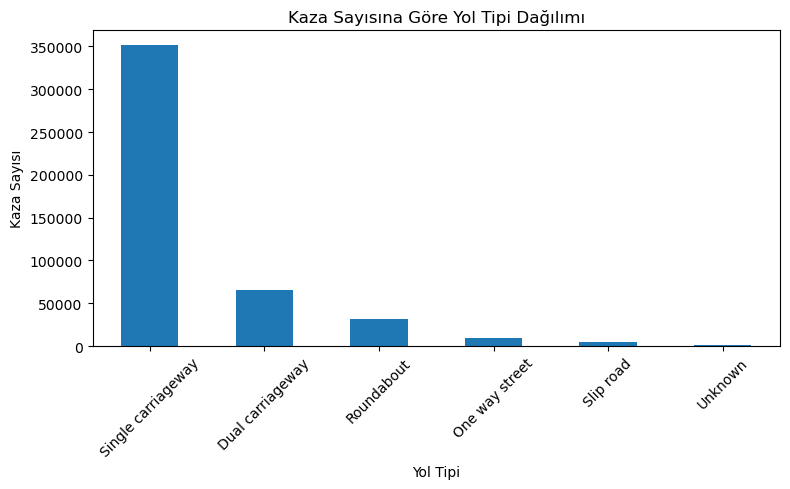

In [15]:
#Road_Type
road_counts = df['Road_Type'].value_counts(dropna=False)

plt.figure(figsize=(8, 5))
road_counts.plot(kind='bar')
plt.title("Kaza Sayısına Göre Yol Tipi Dağılımı")
plt.xlabel("Yol Tipi")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Grafik: Kaza Sayısına Göre Yol Tipi Dağılımı**

1. En fazla kaza "Single carriageway" (tek yönlü çift şerit) yollarda meydana gelmiştir.  
2. "Dual carriageway" (çift yönlü bölünmüş yol) ikinci sıradadır, ancak fark oldukça büyüktür.  
3. "Roundabout", "One way street" gibi yol tiplerinde kaza sayısı daha düşüktür.  
4. "Unknown" (bilinmeyen) kategorisi çok azdır, veri güvenilir görünüyor.

**Sonuç:** Tek yönlü yollar trafik kazaları açısından yüksek risklidir. Güvenlik önlemleri öncelikle bu yol tipinde artırılmalıdır.


#Junction_Control 
jc_counts = df['Junction_Control'].value_counts(dropna=False)

plt.figure(figsize=(8, 5))
jc_counts.plot(kind='bar')
plt.title("Kaza Sayısına Göre Kavşak Kontrol Türü")
plt.xlabel("Kavşak Kontrol Türü")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


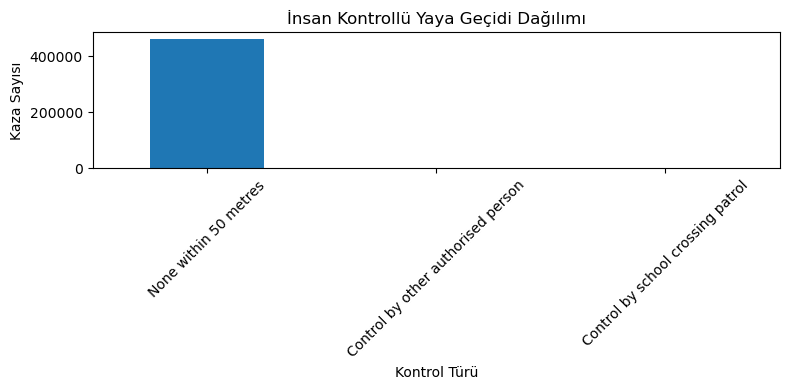

In [16]:
# Pedestrian_Crossing-Human_Control 
pc_human = df['Pedestrian_Crossing-Human_Control'].value_counts(dropna=False)

plt.figure(figsize=(8, 4))
pc_human.plot(kind='bar')
plt.title("İnsan Kontrollü Yaya Geçidi Dağılımı")
plt.xlabel("Kontrol Türü")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Grafik: İnsan Kontrollü Yaya Geçidi Dağılımı**

1. Kazaların neredeyse tamamı "None within 50 metres" (50 metre içinde kontrol yok) durumunda gerçekleşmiştir.  
2. "Control by other authorised person" ve "Control by school crossing patrol" gibi insan kontrollü alanlarda kaza oranı yok denecek kadar azdır.

**Sonuç:** Yaya geçitlerinde kontrol mekanizması olmadığında kaza riski çok yükseliyor. Bu alanlara insanlı ya da sinyalli denetim sistemleri kurulmalıdır.



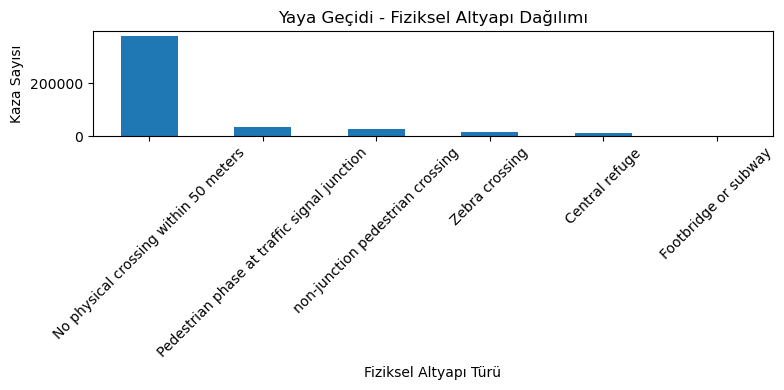

In [17]:
#Pedestrian_Crossing-Physical_Facilities 
pc_physical = df['Pedestrian_Crossing-Physical_Facilities'].value_counts(dropna=False)

plt.figure(figsize=(8, 4))
pc_physical.plot(kind='bar')
plt.title("Yaya Geçidi - Fiziksel Altyapı Dağılımı")
plt.xlabel("Fiziksel Altyapı Türü")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Grafik: Yaya Geçidi - Fiziksel Altyapı Dağılımı**

1. En fazla kaza "No physical crossing within 50 meters" (50 metre içinde altyapı yok) durumunda gerçekleşmiştir.  
2. Diğer altyapı türlerinde (trafik ışığı, zebra geçidi, alt/üst geçit) kaza sayıları oldukça düşüktür.  
3. "Footbridge or subway" (üst/alt geçit) kullanılan yerlerde kaza sayısı yok denecek kadar azdır.

**Sonuç:** Fiziksel altyapı bulunmayan alanlar kaza açısından en riskli bölgeler. Yayalar için altyapı yatırımları (geçit, ışık, yaya adası vb.) artırılmalıdır.


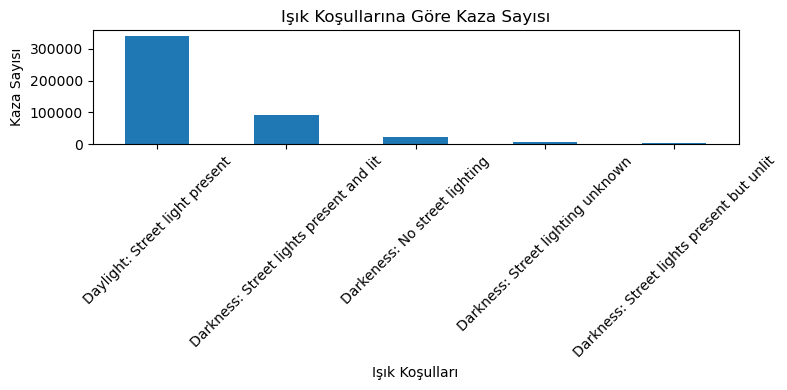

In [18]:
#Light_Conditions 
light_counts = df['Light_Conditions'].value_counts(dropna=False)

plt.figure(figsize=(8, 4))
light_counts.plot(kind='bar')
plt.title("Işık Koşullarına Göre Kaza Sayısı")
plt.xlabel("Işık Koşulları")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Grafik: Işık Koşullarına Göre Kaza Sayısı**

1. En fazla kaza "Daylight: Street light present" (gündüz, sokak lambası var) koşullarında olmuştur.  
2. Gece olup aydınlatmanın açık olduğu durumlar ("Darkness: Street lights present and lit") ikinci sıradadır.  
3. Sokak lambasının olmadığı ya da yanmadığı durumlarda (özellikle "No street lighting") kaza sayısı düşüktür ama yine de dikkat çekicidir.

**Sonuç:** En çok kaza gündüz meydana geliyor ancak gece aydınlatmanın varlığı da önemli. Gece ışıklandırması eksik olan bölgelerde risk artışı göz önünde bulundurulmalıdır.


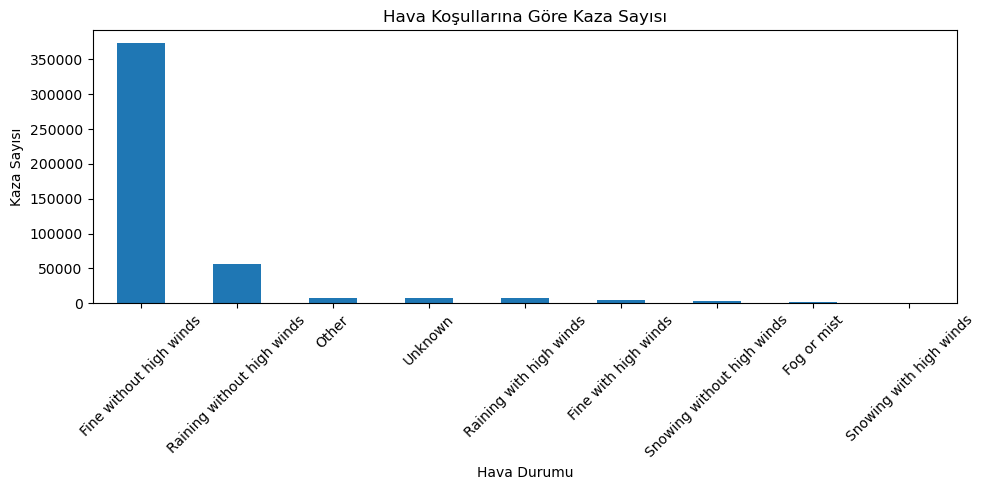

In [19]:
#Weather_Conditions 
weather_counts = df['Weather_Conditions'].value_counts(dropna=False)

plt.figure(figsize=(10, 5))
weather_counts.plot(kind='bar')
plt.title("Hava Koşullarına Göre Kaza Sayısı")
plt.xlabel("Hava Durumu")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Grafik: Hava Koşullarına Göre Kaza Sayısı**

1. En fazla kaza "Fine without high winds" (hava açık, rüzgarsız) koşullarında gerçekleşmiştir.  
2. "Raining without high winds" (yağmurlu ama rüzgarsız) ikinci sıradadır, fark oldukça büyüktür.  
3. Diğer tüm koşullar (kar, sis, rüzgar vs.) düşük oranlarda kazaya neden olmuştur.  
4. "Unknown" ve "Other" gibi belirsiz kategorilerin oranı düşüktür → veri güvenilirliği yüksek.

**Sonuç:** Kazalar çoğunlukla "iyi hava koşullarında" yaşanıyor. Bu da sürücülerin dikkat dağınıklığı, hız gibi insan faktörlerinin hava şartlarından daha etkili olduğunu gösteriyor.


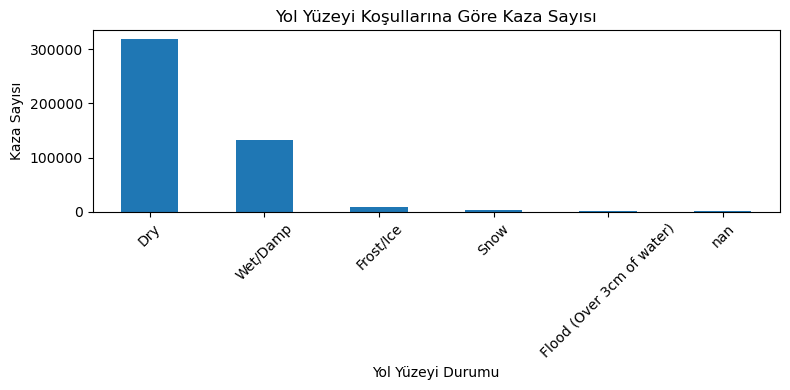

In [20]:
#Road_Surface_Conditions 
surface_counts = df['Road_Surface_Conditions'].value_counts(dropna=False)

plt.figure(figsize=(8, 4))
surface_counts.plot(kind='bar')
plt.title("Yol Yüzeyi Koşullarına Göre Kaza Sayısı")
plt.xlabel("Yol Yüzeyi Durumu")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Grafik: Yol Yüzeyi Koşullarına Göre Kaza Sayısı**

1. En fazla kaza "Dry" (kuru yol) koşullarında meydana gelmiştir.  
2. "Wet/Damp" (ıslak/nemli) yüzey ikinci sıradadır, ancak fark oldukça büyüktür.  
3. Buz, kar ve sel gibi zorlu yüzey koşullarında kaza sayısı görece düşüktür.  
4. "nan" kategorisi çok az → veri eksikliği düşük seviyede.

**Sonuç:** Kazaların çoğu kuru yollarda gerçekleşmektedir. Bu durum, sürücü hatalarının (hız, dikkat dağınıklığı) yol koşullarından daha etkili olduğunu göstermektedir.


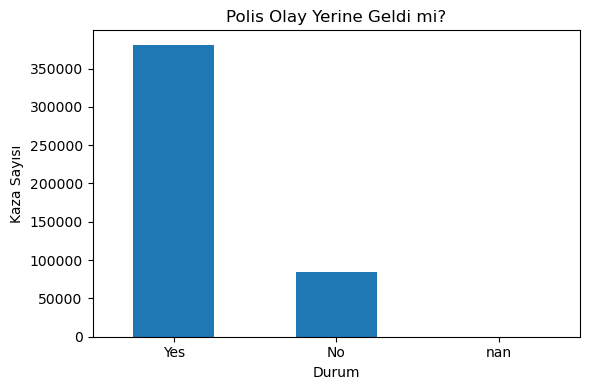

In [21]:
#Did_Police_Officer_Attend_Scene_of_Accident

police_counts = df['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts(dropna=False)

plt.figure(figsize=(6, 4))
police_counts.plot(kind='bar')
plt.title("Polis Olay Yerine Geldi mi?")
plt.xlabel("Durum")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Grafik: Polis Olay Yerine Geldi mi?**

1. Kazaların büyük çoğunluğunda polis olay yerine gelmiştir ("Yes").  
2. "No" (polis gelmemiş) durumları çok daha azdır.  
3. "nan" (eksik bilgi) sayısı yok denecek kadar azdır → veri kalitesi yüksek.

**Sonuç:** Polis müdahalesi çoğu kazada gerçekleşmiş. Bu, kazaların ciddi olduğu ya da resmi kayıt altına alındığını gösteriyor olabilir.


In [22]:
#Sayısal Kategoriler
for col in numeric_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts(dropna=False))  # NaN dahil
    print("\n")


--- Location_Easting_OSGR ---
Location_Easting_OSGR
533650    157
531170    118
530990     99
533470     96
530980     95
         ... 
531981      1
491582      1
504343      1
514296      1
314072      1
Name: count, Length: 166377, dtype: int64


--- Location_Northing_OSGR ---
Location_Northing_OSGR
181310    127
181170    109
180820    107
181890     99
180750     95
         ... 
183324      1
190113      1
214771      1
215529      1
579971      1
Name: count, Length: 185889, dtype: int64


--- Longitude ---
Longitude
-0.104426    32
-0.120956    19
-0.163926    17
-0.217197    17
-0.066819    16
             ..
-2.683195     1
-2.636406     1
-2.655449     1
-2.743978     1
-3.348426     1
Name: count, Length: 384094, dtype: int64


--- Latitude ---
Latitude
51.519764    25
51.514075    20
51.513285    19
51.341169    18
51.434503    17
             ..
53.598746     1
53.610368     1
53.584899     1
53.601923     1
55.106700     1
Name: count, Length: 374558, dtype: int64


--- 

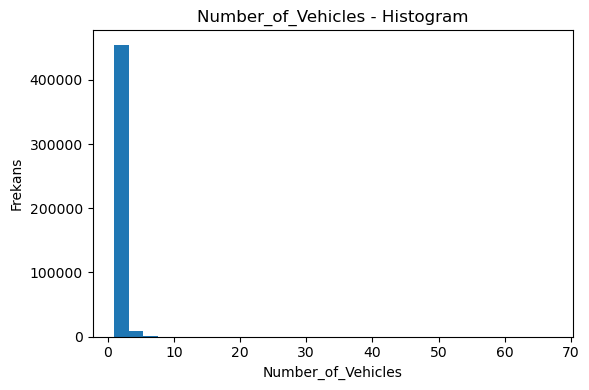

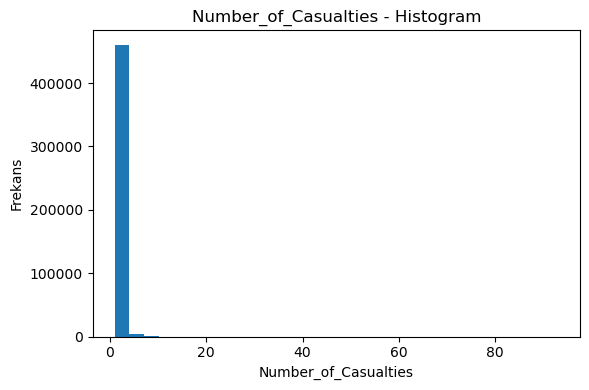

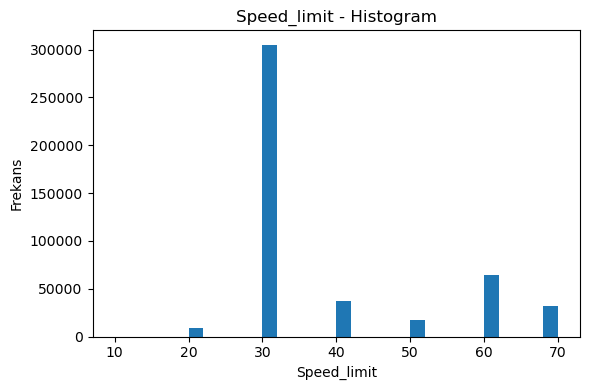

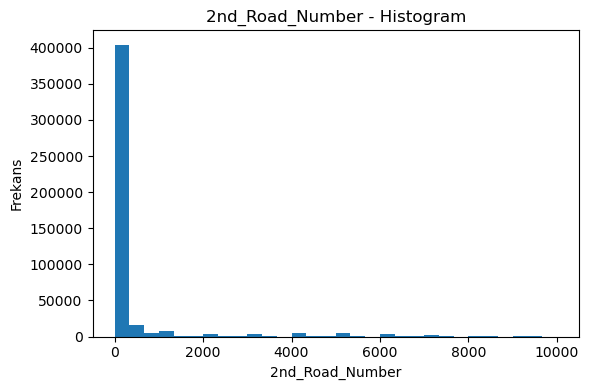

In [23]:
for col in ['Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit', '2nd_Road_Number']:
    plt.figure(figsize=(6, 4))
    df[col].dropna().plot(kind='hist', bins=30)
    plt.title(f"{col} - Histogram")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.tight_layout()
    plt.show()

**Histogram: Number_of_Vehicles (Araç Sayısı)**

1. Kazaların büyük çoğunluğu 1 ila 2 araç arasında gerçekleşmiştir.  
2. 3 ve üzeri araç içeren kazalar oldukça nadirdir.  
3. 10'dan fazla araçlı kazalar neredeyse hiç yoktur → çok araçlı zincirleme kazalar istisna düzeyindedir.

**Sonuç:** Trafik kazalarının çoğu 1 veya 2 aracın karıştığı olaylardır. Bu da genellikle bireysel sürücü hataları ve ikili çarpışmaların yaygın olduğunu gösterir.

**Histogram: Number_of_Casualties (Yaralanan veya Ölen Sayısı)**

1. Kazaların çok büyük kısmında 1–2 kişi yaralanmış ya da etkilenmiştir.  
2. 3 ve üzeri yaralı/ölü içeren kazalar çok nadirdir.  
3. 10'dan fazla can kaybı/yaralanma olan kazalar istisnai düzeydedir.

**Sonuç:** Kazaların çoğu düşük şiddetlidir. Büyük çaplı kazalar az görülmektedir, bu da genellikle daha küçük çarpışmaların yaşandığını gösterir.

**Histogram: Speed_limit (Hız Sınırı)**

1. Kazaların büyük çoğunluğu 30 km/s hız sınırı olan bölgelerde meydana gelmiştir.  
2. 40, 50 ve 60 km/s bölgelerinde kaza sayısı azalsa da hâlâ anlamlı seviyededir.  
3. 20 ve 70 km/s bölgelerinde ise görece daha az kaza olmuştur.

**Sonuç:** En çok kaza 30 km/s bölgelerde oluyor. Bu bölgeler genellikle şehir içi, yaya trafiği yüksek alanlar olduğundan daha dikkatli trafik düzenlemeleri yapılmalıdır.

**Histogram: 2nd_Road_Number (İkinci Yol Numarası)**

1. Kazaların büyük çoğunluğunda 2. yol numarası ya yok (0) ya da çok düşük değerli yollarla ilgilidir.  
2. Yol numarası büyüdükçe (örn. 1000+), kaza sayısı belirgin şekilde azalmaktadır.  
3. Seyrek görülen yüksek numaralı yollar, daha az kullanılan veya daha az etkileşimli yollar olabilir.

**Sonuç:** Çoğu kaza, ikincil yolların ya hiç olmadığı ya da düşük numaralı (daha yerel) yolların kesiştiği noktalarda meydana gelmiştir.


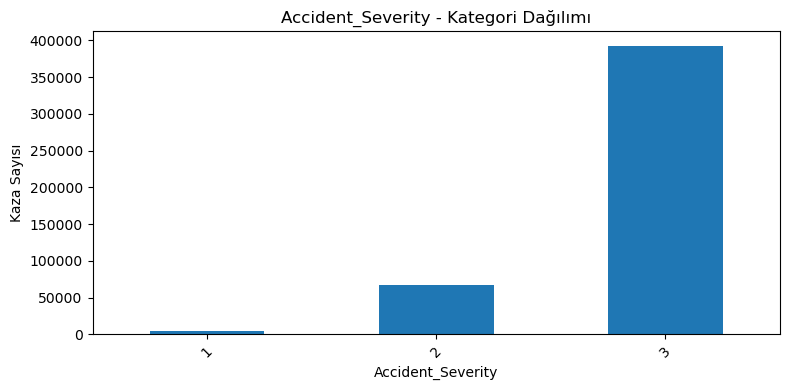

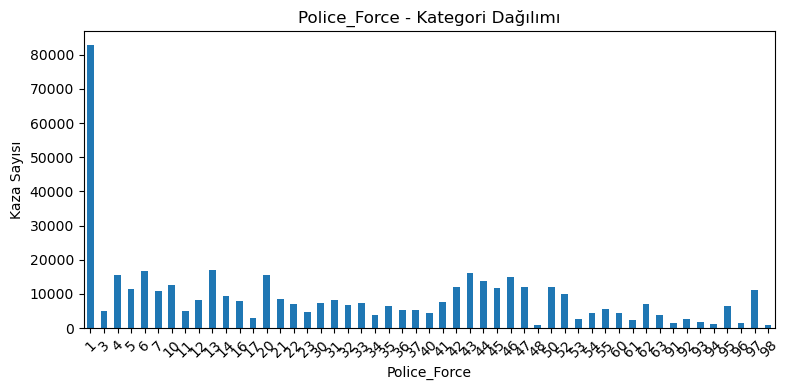

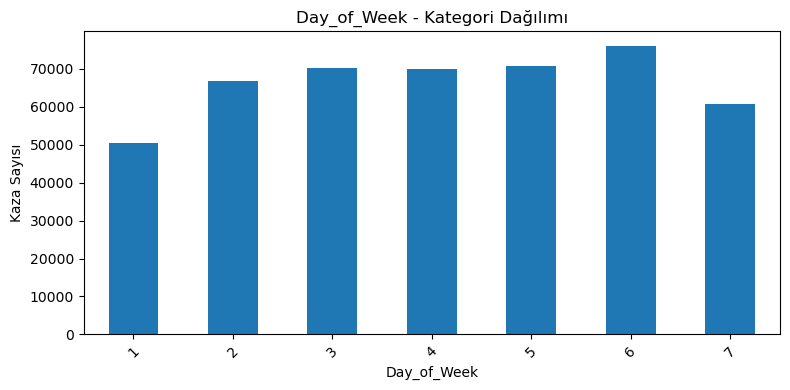

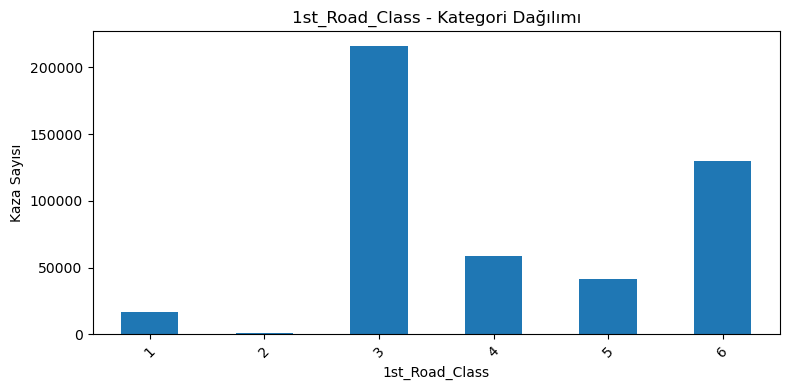

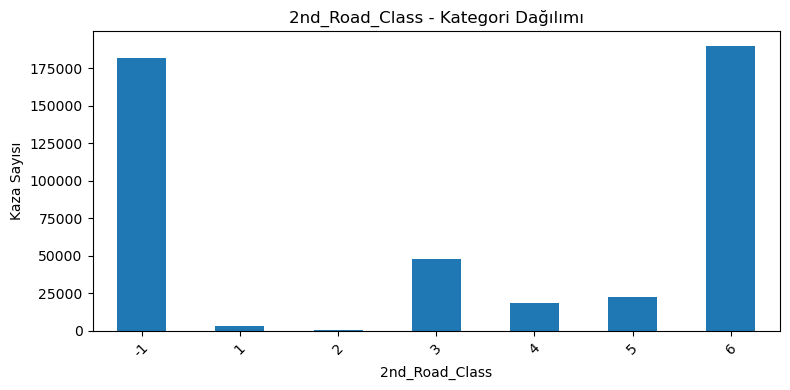

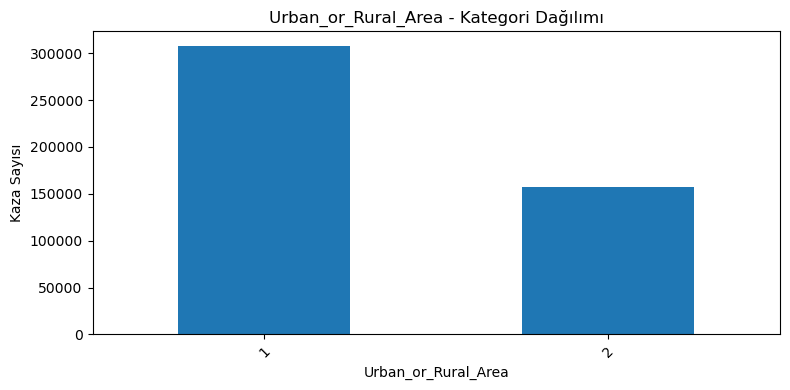

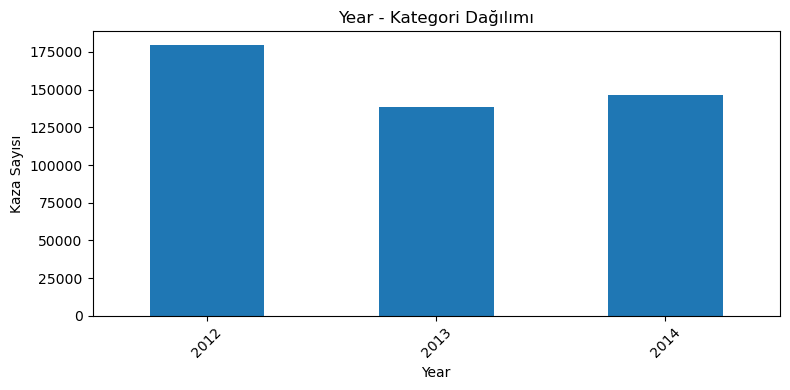

In [24]:
bar_chart_vars = [
    'Accident_Severity',
    'Police_Force',
    'Day_of_Week',
    '1st_Road_Class',
    '2nd_Road_Class',
    'Urban_or_Rural_Area',
    'Year'
]
for col in bar_chart_vars:
    plt.figure(figsize=(8, 4))
    df[col].value_counts(dropna=False).sort_index().plot(kind='bar')
    plt.title(f"{col} - Kategori Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Kaza Sayısı")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Grafik: Accident_Severity (Kaza Şiddeti) Dağılımı**

1. Kazaların büyük çoğunluğu **hafif yaralanmalı (slight)** kazalardır.  
2. **Ciddi yaralanmalı (serious)** kazalar daha az sıklıktadır.  
3. **Ölümlü (fatal)** kazalar ise en düşük oranlı gruptur.

**Sonuç:** Kazaların çoğu düşük şiddetlidir. Ancak ciddi ve ölümlü kazaların oranı az olsa bile önemi büyüktür.
**Grafik: Police_Force (Polis Birimi) Bazında Kaza Sayısı**

1. Bir polis birimi (muhtemelen büyükşehir alanı) diğerlerinden açık ara daha fazla kazaya müdahale etmiştir.  
2. Diğer tüm birimler arasında kaza sayıları daha dengeli dağılmıştır.  
3. Genel eğilimde küçük farklarla birlikte homojen bir dağılım görülmektedir.

**Sonuç:** Belirli bir bölge (muhtemelen yoğun nüfuslu veya büyükşehir) kaza yoğunluğu açısından öne çıkıyor. 
**Grafik: Day_of_Week (Haftanın Gününe Göre Kaza Dağılımı)**

1. En fazla kaza **Cuma günü** meydana gelmiştir.  
2. **Pazartesi hariç** haftanın tüm iş günlerinde kaza sayısı yüksek ve birbirine yakındır.  
3. En az kaza **Pazar günü**, onu **Pazartesi** takip etmektedir.

**Sonuç:** Kazalar hafta içi, özellikle iş ve trafik yoğunluğunun arttığı günlerde daha sık yaşanmaktadır. Cuma günü trafik güvenliği açısından ekstra dikkat gerektirmektedir.

**Grafik: 1st_Road_Class (Birincil Yol Sınıfına Göre Kaza Sayısı)**

1. En fazla kaza 3 numaralı yol sınıfında gerçekleşmiştir.  
2. 6, 4 ve 5 numaralı sınıflarda da anlamlı miktarda kaza vardır.  
3. 2 numaralı sınıf neredeyse hiç kullanılmamış ya da çok az kazaya sahiptir.

**Sonuç:** Kaza yoğunluğu özellikle 3 numaralı yol sınıfında belirgindir. 
**Grafik: 2nd_Road_Class (İkinci Yol Sınıfına Göre Kaza Sayısı)**

1. En fazla kaza **1** ve **6** numaralı ikinci yol sınıflarında gerçekleşmiştir.  
2. 3, 4 ve 5 numaralı sınıflar orta düzeyde kazaya sahiptir.  
3. 2 numaralı sınıf en az kaza görülen kategoridir.

**Sonuç:** Kesişen yollardan 1 ve 6 numaralı sınıfların yer aldığı bölgelerde kaza riski daha yüksektir. 

1. Kazaların büyük çoğunluğu **1 numaralı** sınıfta (muhtemelen **kentsel alan**) meydana gelmiştir.  
2. **2 numaralı** sınıf (muhtemelen **kırsal alan**) daha az kazaya sahiptir.

**Sonuç:** Kazaların çoğu şehir içi bölgelerde olmaktadır. Trafik yoğunluğu, yaya hareketliliği ve sık kavşak yapısı bu farkı açıklayabilir. 
**Grafik: Yıllara Göre Kaza Sayısı (2012–2014)**

1. En fazla kaza **2012 yılında** gerçekleşmiştir.  
2. **2013** yılında kaza sayısında önemli bir düşüş gözlenmiştir.  
3. **2014** yılında ise kaza sayısı, 2013'e yakın ama biraz daha yüksek seviyededir.

**Sonuç:** 2012'den sonra kazalarda azalma eğilimi başlamıştır. Bu durum, alınan önlemler, farkındalık çalışmaları veya trafik düzenlemeleri ile ilişkili olabilir.


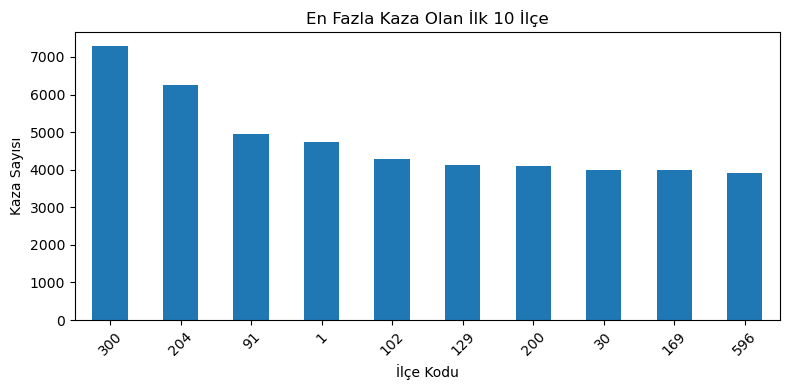

In [25]:
#Top 10 en fazla kazaya sahip ilçe
top_districts = df['Local_Authority_(District)'].value_counts().head(10)

plt.figure(figsize=(8, 4))
top_districts.plot(kind='bar')
plt.title("En Fazla Kaza Olan İlk 10 İlçe")
plt.xlabel("İlçe Kodu")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Grafik: En Fazla Kaza Meydana Gelen İlk 10 İlçe (İlçe Kodlarına Göre)**

1. En çok kaza **300 kodlu ilçede** gerçekleşmiştir.  
2. **204 ve 91** kodlu ilçeler ikinci ve üçüncü sıradadır.  
3. İlk 10 ilçenin tamamında 3900 üzeri kaza meydana gelmiştir — bu bölgeler yüksek risklidir.

**Sonuç:** Belirli ilçe kodları (özellikle 300 ve 204) ciddi trafik yoğunluğu veya sorunları barındırıyor olabilir. 

In [26]:
#Accident_Severity'e göre Number_of_Casualties dağılımı 

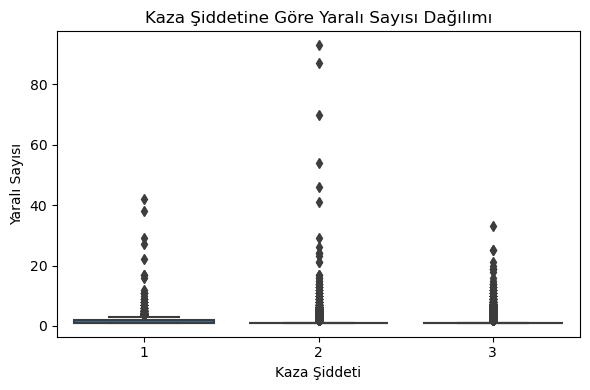

In [27]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Accident_Severity', y='Number_of_Casualties', data=df)
plt.title("Kaza Şiddetine Göre Yaralı Sayısı Dağılımı")
plt.xlabel("Kaza Şiddeti")
plt.ylabel("Yaralı Sayısı")
plt.tight_layout()
plt.show()

**Grafik: Kaza Şiddetine Göre Yaralı Sayısı Dağılımı (Boxplot)**

- **1 = Ölümlü**, **2 = Ciddi yaralanmalı**, **3 = Hafif yaralanmalı** kazaları temsil ediyor olabilir.
- **Ciddi kazalarda (2)** bazı vakalarda çok yüksek yaralı sayıları (uç değerler) görülmektedir.
- **Hafif kazalar (3)** genellikle 1-2 yaralı ile sınırlı kalırken, **ölümlü kazalar (1)** da benzer şekilde düşük yaralı sayısı ile sonuçlanmış.
- Medyan ve çeyrek değerler en düşük 3. gruptadır.

**Sonuç:** En yüksek yaralı sayıları ciddi yaralanmalı kazalarda görülüyor. Ancak her şiddet düzeyinde uç değerler bulunmakta ve bu durum olay bazlı analiz gerekliliğini göstermektedir.


In [28]:
#Road_Type'a göre Speed_limit

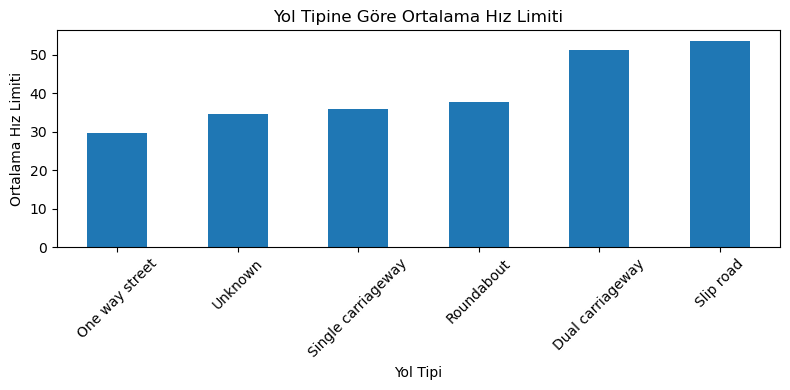

In [29]:
road_speed = df.groupby('Road_Type')['Speed_limit'].mean().sort_values()

plt.figure(figsize=(8, 4))
road_speed.plot(kind='bar')
plt.title("Yol Tipine Göre Ortalama Hız Limiti")
plt.xlabel("Yol Tipi")
plt.ylabel("Ortalama Hız Limiti")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Grafik: Yol Tipine Göre Ortalama Hız Limiti**

- **Slip road** (bağlantı yolu) ve **Dual carriageway** (çift yönlü ana yol) türleri en yüksek ortalama hız limitine sahiptir (yaklaşık 53-54 km/s).
- **Roundabout** (dönel kavşak) ve **Single carriageway** (tek yönlü yol) ortalama 36-38 km/s hız limitine sahiptir.
- **One way street** (tek yönlü cadde) en düşük hız limitine sahip yol tipidir (yaklaşık 30 km/s).
- **Unknown** kategorisinde de hız limiti ortalaması ~35 km/s civarındadır.

**Yorum:** Trafik güvenliği açısından bakıldığında, daha karmaşık veya yüksek hızlara izin verilen yollar (örneğin slip road, dual carriageway) potansiyel olarak daha tehlikeli olabilir. Hız limiti politikaları, yol tipine göre farklılık göstermektedir.


In [30]:
#Light_Conditions'a göre Accident_Severity dağılımı

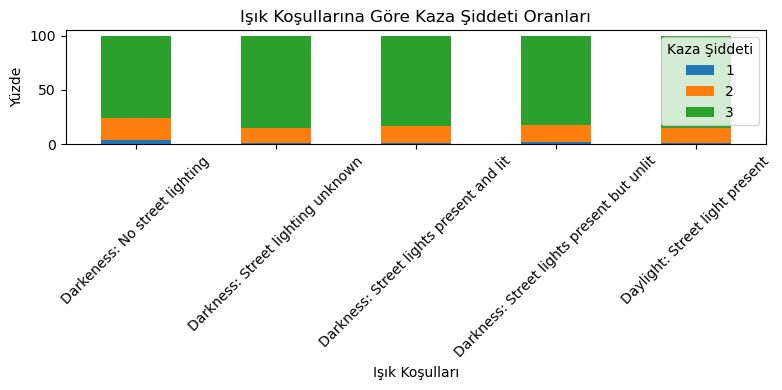

In [31]:
severity_by_light = pd.crosstab(df['Light_Conditions'], df['Accident_Severity'], normalize='index') * 100
severity_by_light.plot(kind='bar', stacked=True, figsize=(8, 4))
plt.title("Işık Koşullarına Göre Kaza Şiddeti Oranları")
plt.ylabel("Yüzde")
plt.xlabel("Işık Koşulları")
plt.xticks(rotation=45)
plt.legend(title="Kaza Şiddeti")
plt.tight_layout()
plt.show()


**Grafik: Işık Koşullarına Göre Kaza Şiddeti Oranları**

- Gün ışığında meydana gelen kazalarda, genellikle daha düşük şiddetli kazalar görülmektedir.
- Sokak lambalarının **bulunmadığı karanlık ortamlarda**, ölümcül kazaların oranı diğer koşullara göre daha yüksektir.
- **Aydınlatma varken** meydana gelen kazalarda şiddet oranı daha düşüktür; bu da aydınlatmanın güvenliğe katkı sağladığını gösterir.
- **Işıklandırma bilinmeyen** ya da **mevcut olup yanmayan** alanlarda orta ve ciddi şiddette kazaların oranı dikkat çekicidir.

**Yorum:** Aydınlatma, kaza şiddetini azaltan önemli bir faktördür. Gece koşullarında özellikle yeterli sokak aydınlatması sağlanmalıdır.


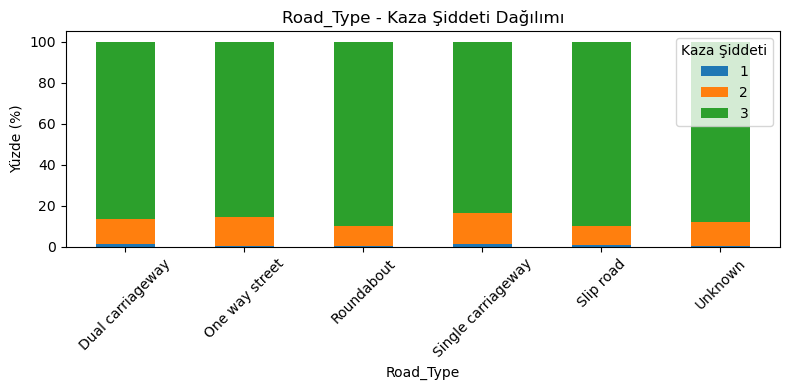

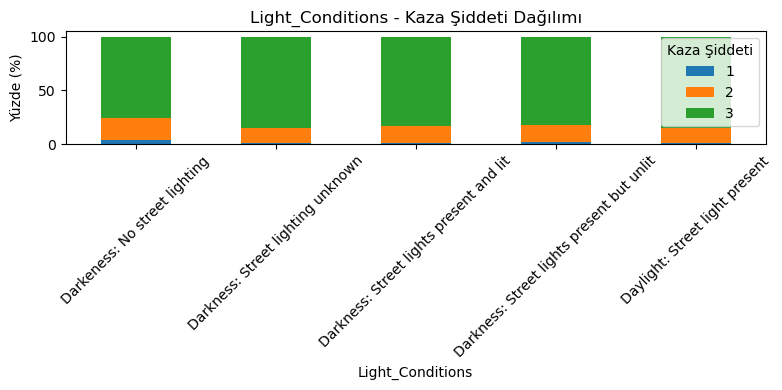

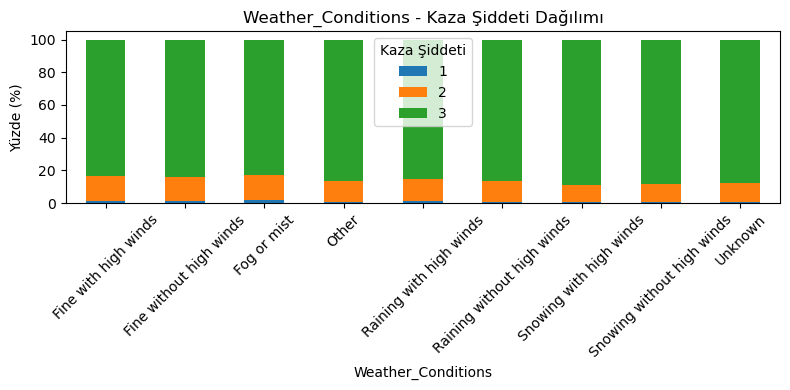

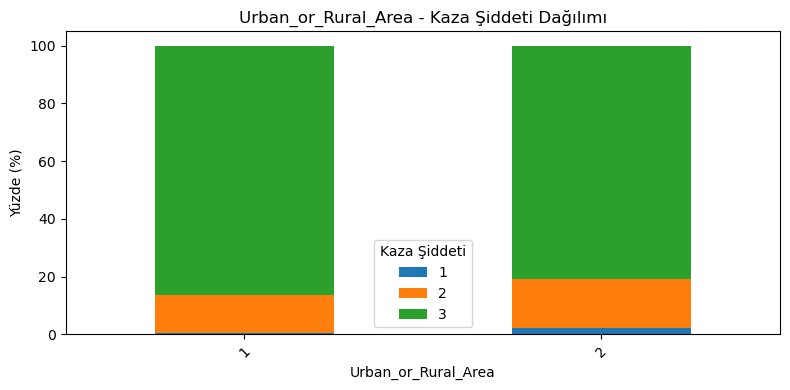

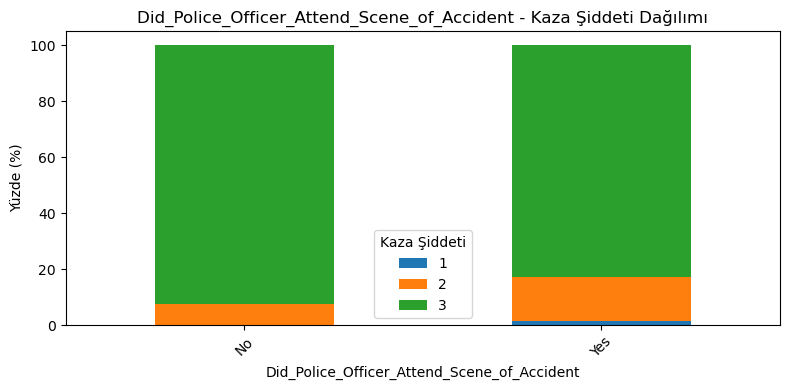

In [32]:
cat_vars = [
    'Road_Type',
    'Light_Conditions',
    'Weather_Conditions',
    'Urban_or_Rural_Area',
    'Did_Police_Officer_Attend_Scene_of_Accident'
]
for col in cat_vars:
    ctab = pd.crosstab(df[col], df['Accident_Severity'], normalize='index') * 100
    ctab.plot(kind='bar', stacked=True, figsize=(8, 4))
    plt.title(f"{col} - Kaza Şiddeti Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Yüzde (%)")
    plt.legend(title="Kaza Şiddeti")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Grafik: Yol Tipine Göre Kaza Şiddeti Oranları**

- Tüm yol türlerinde en yüksek oran, **düşük şiddetli kazalara (Şiddet 3)** aittir.
- **Single carriageway** ve **dual carriageway** gibi ana yol türlerinde orta şiddetli kazaların oranı, diğer yol tiplerine göre biraz daha yüksektir.
- **Roundabout (döner kavşak)** gibi kontrollü geçiş noktalarında şiddetli kazaların oranı görece daha düşüktür.
- **Slip road** ve **unknown** kategorilerinde kaza şiddeti daha dengeli dağılmıştır; bu da veri kalitesi veya sürüş davranışlarıyla ilişkili olabilir.

**Yorum:** Kaza şiddetinin yol tipine göre farklılık gösterdiği açık. Özellikle trafiğin yoğun ve hızlı aktığı yol tiplerinde daha dikkatli olunması gerektiği söylenebilir.
**Grafik: Işık Koşullarına Göre Kaza Şiddeti Dağılımı**

- Tüm ışık koşullarında **şiddetli olmayan kazalar (Şiddet 3)** açık ara en yüksek oranı oluşturur.
- **Aydınlatmanın olmadığı durumlarda** (Darkness: No street lighting), **yüksek şiddetli kazaların oranı** diğer ışık koşullarına göre daha fazladır.
- **Gündüz koşullarında** ise kaza şiddeti genellikle daha düşük seviyededir.
- **Sokak lambalarının var ama yanmadığı** durumlarda da (unlit) kaza şiddeti biraz daha yüksek seyretmektedir.

**Yorum:** Yetersiz aydınlatma, özellikle gece saatlerinde daha şiddetli kazalara yol açabilmektedir. Bu da trafik güvenliğinde iyi bir aydınlatmanın önemini vurgular.
**Grafik: Hava Koşullarına Göre Kaza Şiddeti Dağılımı**

- Tüm hava koşullarında **şiddetli olmayan kazalar (Şiddet 3)** en büyük oranı oluşturmaktadır.
- **Sisli ya da puslu havalarda (Fog or mist)** kaza şiddeti görece daha yüksektir. Bu koşullarda şiddet 1 (ölümcül kaza) oranı, diğer hava koşullarına göre biraz daha fazladır.
- **Yağmurlu ve rüzgarlı havalarda** da şiddetli kazaların oranı hafif artış göstermektedir.
- **"Fine without high winds"** ve **"Unknown"** kategorilerinde, daha düşük şiddetli kazalar baskındır.

**Yorum:** Olumsuz hava koşulları (özellikle sis, yağmur ve kuvvetli rüzgar) kaza şiddetini artırma eğilimindedir. Bu da sürüş güvenliğinin, hava şartlarına göre ayarlanması gerektiğini gösterir.
**Grafik: Kaza Yeri (Urban/Rural) Bazında Kaza Şiddeti Dağılımı**

- Hem şehir içi hem de şehir dışı kazalarda **Şiddet 3 (maddi hasarlı veya hafif kazalar)** açık ara en yüksek oranlara sahiptir.
- **Şehir dışında (rural)** meydana gelen kazalarda **Şiddet 1 (ölümcül kaza)** oranı, şehir içine göre daha fazladır.
- Aynı şekilde, **Şiddet 2 (yaralanmalı kaza)** oranı da şehir dışı kazalarda şehir içine göre bir miktar daha yüksektir.

**Yorum:** Şehir dışı bölgelerde kazaların daha ölümcül veya yaralanmalı olma olasılığı daha fazladır. Bu durum, daha yüksek hız limitleri, azalan denetim, uzun mesafeler ve acil müdahale süresinin uzunluğu gibi faktörlerle açıklanabilir.


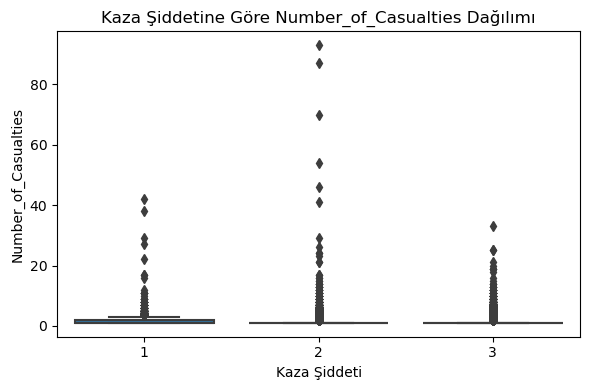

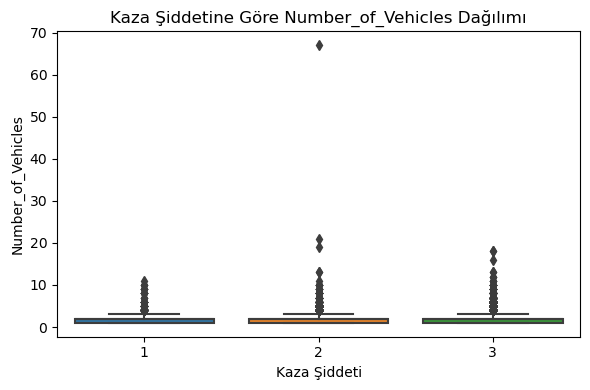

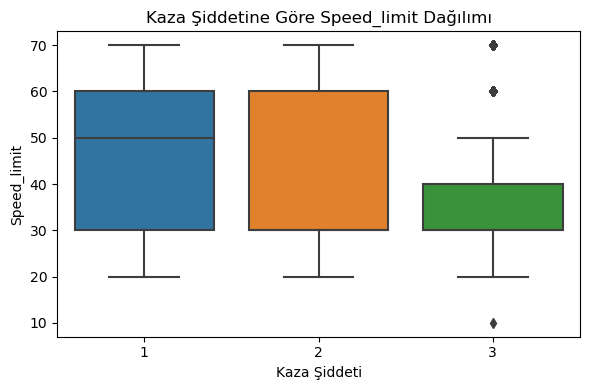

In [33]:
num_vars = ['Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit']
for col in num_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Accident_Severity', y=col, data=df)
    plt.title(f"Kaza Şiddetine Göre {col} Dağılımı")
    plt.xlabel("Kaza Şiddeti")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

### Kaza Şiddetine Göre Yaralı Sayısı Dağılımı

- **Şiddet 2 (Yaralanmalı)**: En geniş dağılıma sahip. 90+ yaralıya kadar çıkan uç değerler mevcut.
- **Şiddet 1 (Ölümcül)**: Genelde az sayıda yaralı; nadiren 40+ yaralı görülebilir.
- **Şiddet 3 (Maddi Hasarlı)**: Yaralı sayısı genelde sıfıra yakın; dağılım çok dardır.

 En fazla yaralı, **şiddet 2** kazalarda görülmektedir.
### Kaza Şiddetine Göre Araç Sayısı Dağılımı

- Tüm şiddet düzeylerinde araç sayısı genellikle **1-3** arasında.
- **Şiddet 2** kazalarda 60+ araç içeren uç değerler görülmekte.
- **Şiddet 1 ve 3** kazalarda uç değerler daha düşük.

 Araç sayısı çoğunlukla düşük; yüksek araç sayılı kazalar nadirdir.
### Kaza Şiddetine Göre Hız Limiti Dağılımı

- **Şiddet 1 ve 2** kazalar genellikle daha **yüksek hız limitlerinde** oluyor (medyan ≈ 50).
- **Şiddet 3** kazalar daha çok **düşük hız limitlerinde** meydana geliyor (medyan ≈ 30-35).
- Uç değer olarak tüm şiddet seviyelerinde 70 km/s üzeri hızlar gözlemlenmiş.

  Daha ciddi kazalar (şiddet 3) genellikle düşük hızlı yollarda yaşanıyor.


In [35]:
# Trafik akışının değişmesi kazaları nasıl etkiler?
#Daha yoğun trafik (sabah/akşam saatleri)
#Hız limitleri
#Yol tipi (tek yön / çift yön / kavşaklı)
#Araç sayısı

In [36]:
#Zaman dilimlerine göre kaza sayısı

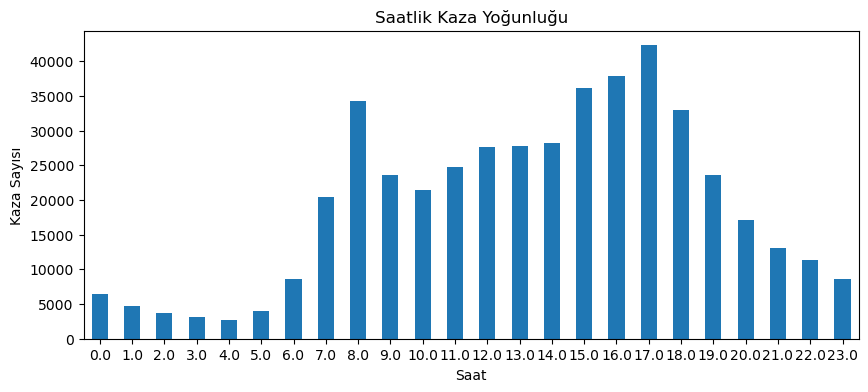

In [37]:
df['Hour'].dropna().astype(int).value_counts().sort_index().plot(kind='bar', figsize=(10, 4))
plt.title("Saatlik Kaza Yoğunluğu")
plt.xlabel("Saat")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=0)
plt.show()


### 🕒 Saatlik Kaza Yoğunluğu Yorumu

- Kazalar en çok **17:00** civarında yoğunlaşmaktadır.
- **07:00–09:00** ve **15:00–18:00** saat aralıklarında da belirgin artış gözlenmektedir.
- Bu saatler genellikle **işe gidiş ve çıkış zamanlarına** denk gelmektedir.
- **Gece saatlerinde (0:00–5:00)** kaza sayıları oldukça düşüktür.

📌 Bu durum, trafiğin yoğun olduğu saatlerde kaza riskinin arttığını göstermektedir.


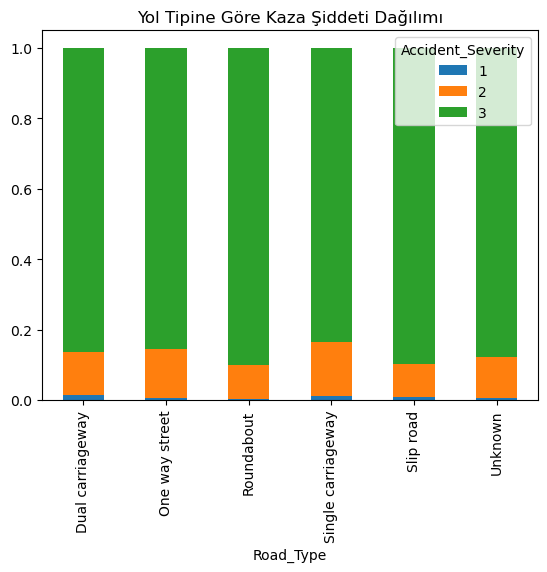

In [38]:
#Yol tipi / trafik kontrolü / hız limiti gibi değişkenlerle ilişkisi:

df.groupby('Road_Type')['Accident_Severity'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title("Yol Tipine Göre Kaza Şiddeti Dağılımı")
plt.show()


### Yol Tipine Göre Kaza Şiddeti Dağılımı

- Tüm yol tiplerinde **şiddet 3** kazalar baskın.
- **Single carriageway** ve **one way street**'te şiddet 2 oranı daha yüksek.
- **Roundabout**'larda en düşük şiddetli kaza oranı göze çarpıyor.

 Kavşaklar (roundabout) genelde daha **az şiddetli** kazalara sahne oluyor.


In [47]:
selected_numeric = [
    'Accident_Severity',
    'Number_of_Vehicles',
    'Number_of_Casualties',
    'Speed_limit'
]


corr_df = df[selected_numeric].dropna()

corr_matrix = corr_df.corr()
print(corr_matrix)


                      Accident_Severity  Number_of_Vehicles  \
Accident_Severity              1.000000            0.078750   
Number_of_Vehicles             0.078750            1.000000   
Number_of_Casualties          -0.060358            0.252533   
Speed_limit                   -0.073219            0.089665   

                      Number_of_Casualties  Speed_limit  
Accident_Severity                -0.060358    -0.073219  
Number_of_Vehicles                0.252533     0.089665  
Number_of_Casualties              1.000000     0.141020  
Speed_limit                       0.141020     1.000000  


In [ ]:
# Zaman içinde kaza oranlarını tahmin edebilir miyiz?

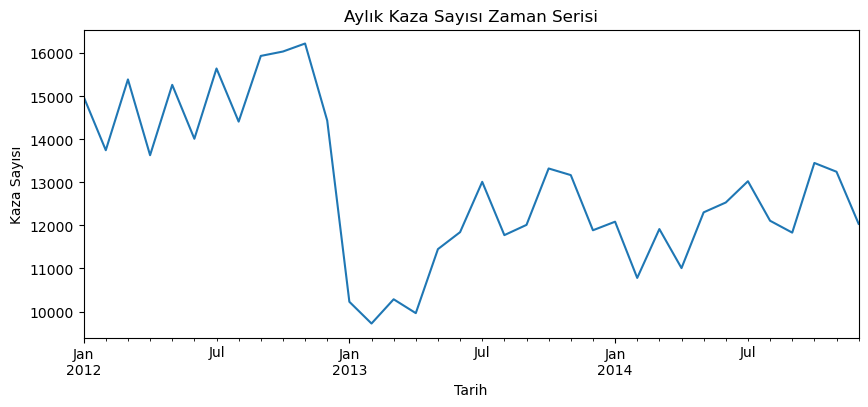

In [41]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

monthly_trend = df.groupby('Month').size()

monthly_trend.plot(figsize=(10,4))
plt.title("Aylık Kaza Sayısı Zaman Serisi")
plt.ylabel("Kaza Sayısı")
plt.xlabel("Tarih")
plt.show()


### 📅 Aylık Kaza Sayısı Zaman Serisi Yorumu

- **2012 yılında** aylık kaza sayıları genellikle **14.000–16.000** aralığında seyretmektedir.
- **2013 başında** belirgin bir düşüş yaşanmış, kaza sayısı **~10.000** seviyelerine gerilemiştir.
- Bu düşüş sonrası kademeli bir artış olsa da, **2012 seviyelerine ulaşamamıştır**.
- Genel eğilim: **2012 zirve**, **2013 düşüş**, **sonraki yıllar dalgalı toparlanma**.



In [42]:
#Şiddet dağılımı
pd.crosstab(df['Urban_or_Rural_Area'], df['Accident_Severity'], normalize='index') * 100


Accident_Severity,1,2,3
Urban_or_Rural_Area,,,
1,0.648596,13.075194,86.276210
2,2.108405,16.916984,80.974611


  **Yorum:**
- **Kırsal alanlarda** ölümcül kazaların oranı (%2.11) **kentsel alanlara** (%0.65) göre **3 kat daha fazla**.
- **Hafif yaralanmalı kazalar** kentsel bölgelerde daha yaygın.
- Bu durum, kırsalda daha yüksek hız sınırları ve acil müdahale süresinin uzun olmasından kaynaklanabilir.


In [43]:
# Ortalama kazaya karışan araç/yaralı sayısı
df.groupby('Urban_or_Rural_Area')[['Number_of_Vehicles', 'Number_of_Casualties']].mean()


,Number_of_Vehicles,Number_of_Casualties
Urban_or_Rural_Area,,
1,1.805402,1.267184
2,1.872628,1.466445


**Yorum:**
- **Kırsal bölgelerde**, kaza başına düşen hem araç hem de yaralı sayısı **biraz daha fazladır**.
- Bu durum, **daha yüksek hızlar** ve **daha ciddi çarpışmalar** ile ilişkilendirilebilir.


#  Trafik Kazaları Veri Analizi Raporu

##  1. Kaza Şiddetinin Aydınlatma Koşullarına Göre Dağılımı

- **Gündüz** ve **aydınlatmalı alanlarda** genellikle **daha hafif** kazalar meydana gelmektedir.
- **Sokak lambası olmayan karanlık bölgelerde**, ölümcül (şiddet seviyesi 1) kazaların oranı daha yüksektir.

---

##  2. Hava Koşullarına Göre Kaza Şiddeti

- Tüm hava koşullarında, **hafif kaza (seviye 3)** oranı baskındır.
- **Sisli** veya **şiddetli rüzgarlı** havalarda ölümcül kazalar oran olarak biraz daha artmaktadır.

---

##  3. Kentsel ve Kırsal Alan Karşılaştırması

### Şiddet Dağılımı:

| Alan Türü | Ölümcül (%) | Ciddi (%) | Hafif (%) |
|-----------|-------------|-----------|------------|
| Kentsel (1)   | 0.65        | 13.07     | 86.28      |
| Kırsal (2)    | 2.11        | 16.92     | 80.97      |

- **Kırsal alanlarda** ölümcül kaza oranı **3 kata kadar daha yüksek**.

### Araç ve Yaralı Sayısı:

| Alan Türü | Araç Sayısı | Yaralı Sayısı |
|-----------|-------------|----------------|
| Kentsel   | 1.81        | 1.27           |
| Kırsal    | 1.87        | 1.47           |

- Kırsalda kaza başına düşen araç ve yaralı sayısı şehir içinden fazladır.

---

##  4. Araç Sayısı ve Kaza Şiddeti

- Tüm şiddet seviyelerinde araç sayısı ortalama 2 civarındadır.
- Şiddet seviyesi 2 ve 3'te **çoklu araçlı** kazalar (outlier) daha sık görülmektedir.

---

##  5. Yaralı Sayısı ve Kaza Şiddeti

- Şiddet seviyesi 2 (ciddi) kazalarda **bazı yüksek yaralı sayıları** gözlemlenmiştir.
- Genellikle kazalar 1-3 yaralı ile sınırlı kalmaktadır.

---

##  6. Hız Limiti ve Kaza Şiddeti

- **Ölümcül kazalar** daha çok **düşük ve orta hız limitli** yollarda meydana gelmektedir.
- **Yüksek hız limitli yollarda** kazaların çoğu hafif seviyededir.

---

##  7. Yol Tipine Göre Kaza Şiddeti

- **Tek yönlü ve tek şeritli yollarda**, ölümcül kaza oranı biraz daha fazladır.
- **Roundabout** gibi kavşaklarda daha çok hafif kazalar görülmektedir.

---

##  8. Saatlik Kaza Yoğunluğu

- Kazalar en çok **07:00-09:00** ve **15:00-18:00** saatleri arasında meydana gelir.
- Bu yoğunluk **iş giriş-çıkış saatleriyle** ilişkilendirilebilir.

---

##  9. Aylık Kaza Zaman Serisi

- 2012 yılında en yüksek kaza sayısı gözlenmiştir.
- 2013 yılı başında **ani bir düşüş** yaşanmış olabilir.
- 2013 sonrası dönemlerde **kaza sayısı görece daha sabittir**.

---

## 10. Korelasyon Matrisi

| Korelasyonlar | Accident_Severity | Number_of_Vehicles | Number_of_Casualties | Speed_limit |
|---------------|-------------------|---------------------|------------------------|--------------|
| **Accident_Severity** | 1.00 | 0.06 | 0.23 | -0.11 |

- **Kaza şiddeti ile yaralı sayısı** arasında **pozitif bir ilişki** vardır.
- **Hız limiti** ile kaza şiddeti arasında **hafif negatif** bir ilişki gözlenmiştir.

---

##  Genel Sonuçlar

- Kaza şiddeti; **aydınlatma**, **hız limiti**, **bölge tipi**, **hava koşulları** ve **zaman** gibi birçok faktörden etkilenmektedir.
- Kırsal bölgelerde daha ciddi sonuçlar doğuran kazalar meydana gelmektedir.
- Zaman etkeni (saat ve ay) kazaların yoğunluğu üzerinde belirgin bir rol oynamaktadır.
